# REDPIC 
## Tutotial 
[V. Fedorov](mailto:fuodorov1998@gmail.com)

In [1]:
import redpic as rp
import kenv as kv
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'holoviews'

In [2]:
rp.__version__

'0.7.20'

In [3]:
kv.__version__

'0.3.0.3'

## Some plotting options:

In [4]:
%output size=150 backend='matplotlib' fig='png' dpi=200
%opts Curve Scatter [aspect=3 show_grid=True]
%opts Curve (linewidth=1 alpha=0.7 color='blue')
%opts Scatter (alpha=0.7 s=0.5)

UsageError: Line magic function `%output` not found.


## Define accelerator beamline parameters:

In [5]:
acc = rp.Accelerator(0.7, 10.7, 0.01)

In [6]:
#              Unique name,  z-position [m],  Ez [MV/m],  Ez(z) profile
acc.add_accel('Acc. 1',      4.096,          -1.1,         'Ez.dat')
acc.add_accel('Acc. 2',      5.944,          -1.1,         'Ez.dat')
acc.add_accel('Acc. 3',      6.796,          -1.1,         'Ez.dat')
acc.add_accel('Acc. 4',      8.644,          -1.1,         'Ez.dat')
acc.add_accel('Acc. 5',      9.496,          -1.1,         'Ez.dat')

In [7]:
#                 Unique name,  z-position [m],  Bz [T],  Bz(z) profile
acc.add_solenoid('Sol. 1',      0.45,           -0.058,   'Bz.dat')
acc.add_solenoid('Sol. 2',      0.957,           0.039,   'Bz.dat')
acc.add_solenoid('Sol. 3',      2.107,           0.025,   'Bz.dat')
acc.add_solenoid('Sol. 4',      2.907,           0.044,   'Bz.dat')
acc.add_solenoid('Sol. 5',      3.670,           0.04,    'Bz.dat')
acc.add_solenoid('Sol. 6',      4.570,           0.0595,  'Bz.dat')
acc.add_solenoid('Sol. 7',      5.470,           0.059,   'Bz.dat')
acc.add_solenoid('Sol. 8',      6.370,           0.060,   'Bz.dat')
acc.add_solenoid('Sol. 9',      7.270,           0.065,   'Bz.dat')
acc.add_solenoid('Sol. 10',     8.170,           0.065,   'Bz.dat')
acc.add_solenoid('Sol. 11',     9.070,           0.0655,  'Bz.dat')
acc.add_solenoid('Sol. 12',     9.970,           0.075,   'Bz.dat')

In [8]:
acc.compile()

In [9]:
dim_z  = hv.Dimension('z',  unit='m')
dim_Ez = hv.Dimension('Ez', unit='MV/m', label='$E_z$')
dim_Bz = hv.Dimension('Bz', unit='Gs', label='$B_z$')

In [10]:
z  = acc.z
z_Ez = hv.Curve((z, acc.Ez(z)), kdims=dim_z, vdims=dim_Ez)
z_Bz = hv.Curve((z, acc.Bz(z)*1e4), kdims=dim_z, vdims=dim_Bz)

:Layout
   .Curve.I  :Curve   [z]   (Ez)
   .Curve.II :Curve   [z]   (Bz)
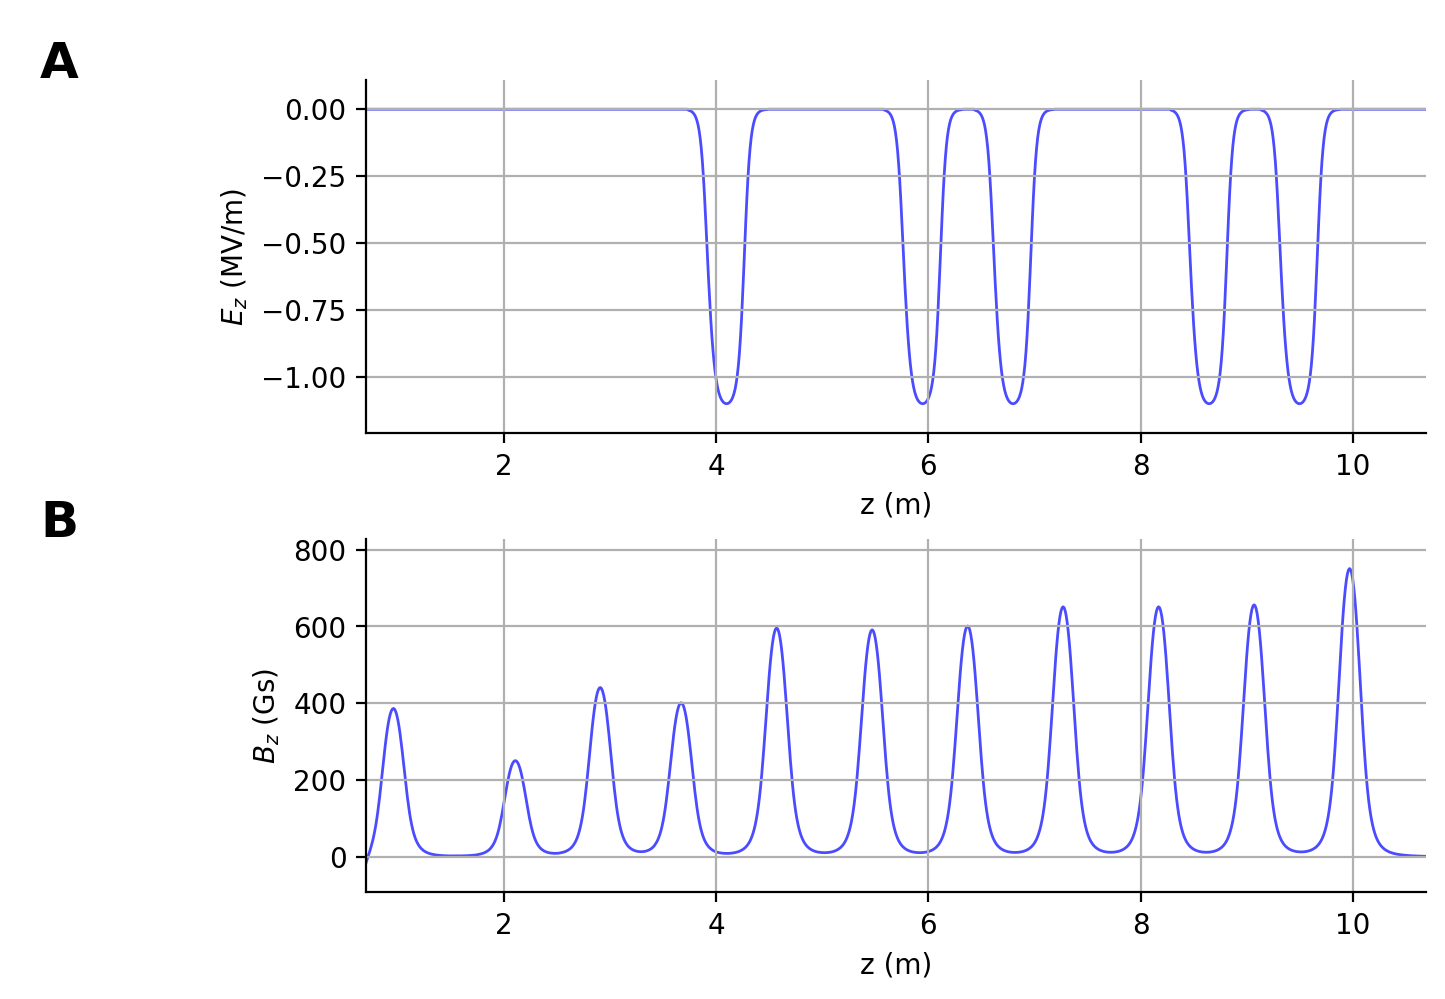

In [11]:
(z_Ez + z_Bz).cols(1)

In [12]:
print(acc)

Accelerator structure.
	Solenoids:
	[ 0.45 m, -0.058 T, Bz.dat, Sol. 1, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 0.957 m, 0.039 T, Bz.dat, Sol. 2, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 2.107 m, 0.025 T, Bz.dat, Sol. 3, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 2.907 m, 0.044 T, Bz.dat, Sol. 4, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 3.67 m, 0.04 T, Bz.dat, Sol. 5, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 4.57 m, 0.0595 T, Bz.dat, Sol. 6, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 5.47 m, 0.059 T, Bz.dat, Sol. 7, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 6.37 m, 0.06 T, Bz.dat, Sol. 8, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 7.27 m, 0.065 T, Bz.dat, Sol. 9, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 8.17 m, 0.065 T, Bz.dat, Sol. 10, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 9.07 m, 0.0655 T, Bz.dat, Sol. 11, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 9.97 m, 0.075 T, Bz.dat, Sol. 12, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	Accelerating modules:
	[ 4.096 m, -1.1 T, Ez.dat, Acc. 1, 0.0 m, 0.0 rad, 0.0 m, 0.0 rad] 
	[ 5.944 m, -1.1 T, Ez.dat, Acc. 2, 0.

## Define beam parameters:

In [9]:
beam = rp.Beam(
    type=rp.electron, 
    energy = 1.32,          # MeV
    current = 0.5e3,  # A
    radius_x = 48e-3, # initial r (m)
    radius_y = 48e-3, # initial r (m)
    radius_z = 3.5,
    radius_xp = 2*35.0e-3,     # initial r' (rad)
    radius_yp = 2*35.0e-3,     # initial r' (rad)
    x  = 0.0e-3,   # horizontal centroid position (m)
    xp = 0.0e-3,     # horizontal centroid angle (rad)
    y = 0,          # vertical centroid position (m)
    normalized_emittance = 200e-6*np.pi*3.58) # m*rad

In [10]:
beam.generate('KV', 10_000)

2023-08-26 17:20:11,059 - redpic.beam - INFO - Generate a beam with a given distribution KV and 10000 particles


In [15]:
beam.df

,x,y,z,px,py,pz
0,0.037309,0.021303,-1.061208,0.111074,0.057512,1.740726
1,0.019552,0.020800,2.371169,0.050237,0.066986,1.754814
2,-0.024938,-0.003443,1.697475,-0.081559,-0.014356,1.760583
3,0.015198,0.029757,-0.680931,0.052144,0.084052,1.766359
4,-0.007235,0.023082,2.166324,-0.027872,0.060012,1.770914
...,...,...,...,...,...,...
9995,-0.002809,-0.007502,-0.329483,-0.013865,-0.012022,1.763342
9996,0.029552,-0.004259,-3.479387,0.091940,-0.019391,1.745810
9997,0.000401,-0.038388,2.745262,-0.002762,-0.117667,1.774619
9998,0.017548,0.027614,-3.116457,0.059462,0.078901,1.757782


In [16]:
dim_x = hv.Dimension('x', unit='m', range=(-0.1, 0.1))
dim_y = hv.Dimension('y', unit='m', range=(-0.1, 0.1))
dim_z = hv.Dimension('z', unit='m', range=(acc.z_start, acc.z_stop))
dim_px = hv.Dimension('px', unit='MeV/c', label='$p_x$')
dim_py = hv.Dimension('py', unit='MeV/c', label='$p_y$')

In [17]:
beam_x_y = hv.Scatter(beam.df, kdims=[dim_x, dim_y])
beam_z_x = hv.Scatter(beam.df, kdims=[dim_z, dim_x])
beam_x_px = hv.Scatter(beam.df, kdims=[dim_x, dim_px])
beam_y_py = hv.Scatter(beam.df, kdims=[dim_y, dim_py])

:Layout
   .Scatter.I   :Scatter   [x,y]   (z,px,py,pz)
   .Scatter.II  :Scatter   [z,x]   (y,px,py,pz)
   .Scatter.III :Scatter   [x,px]   (y,z,py,pz)
   .Scatter.IV  :Scatter   [y,py]   (x,z,px,pz)
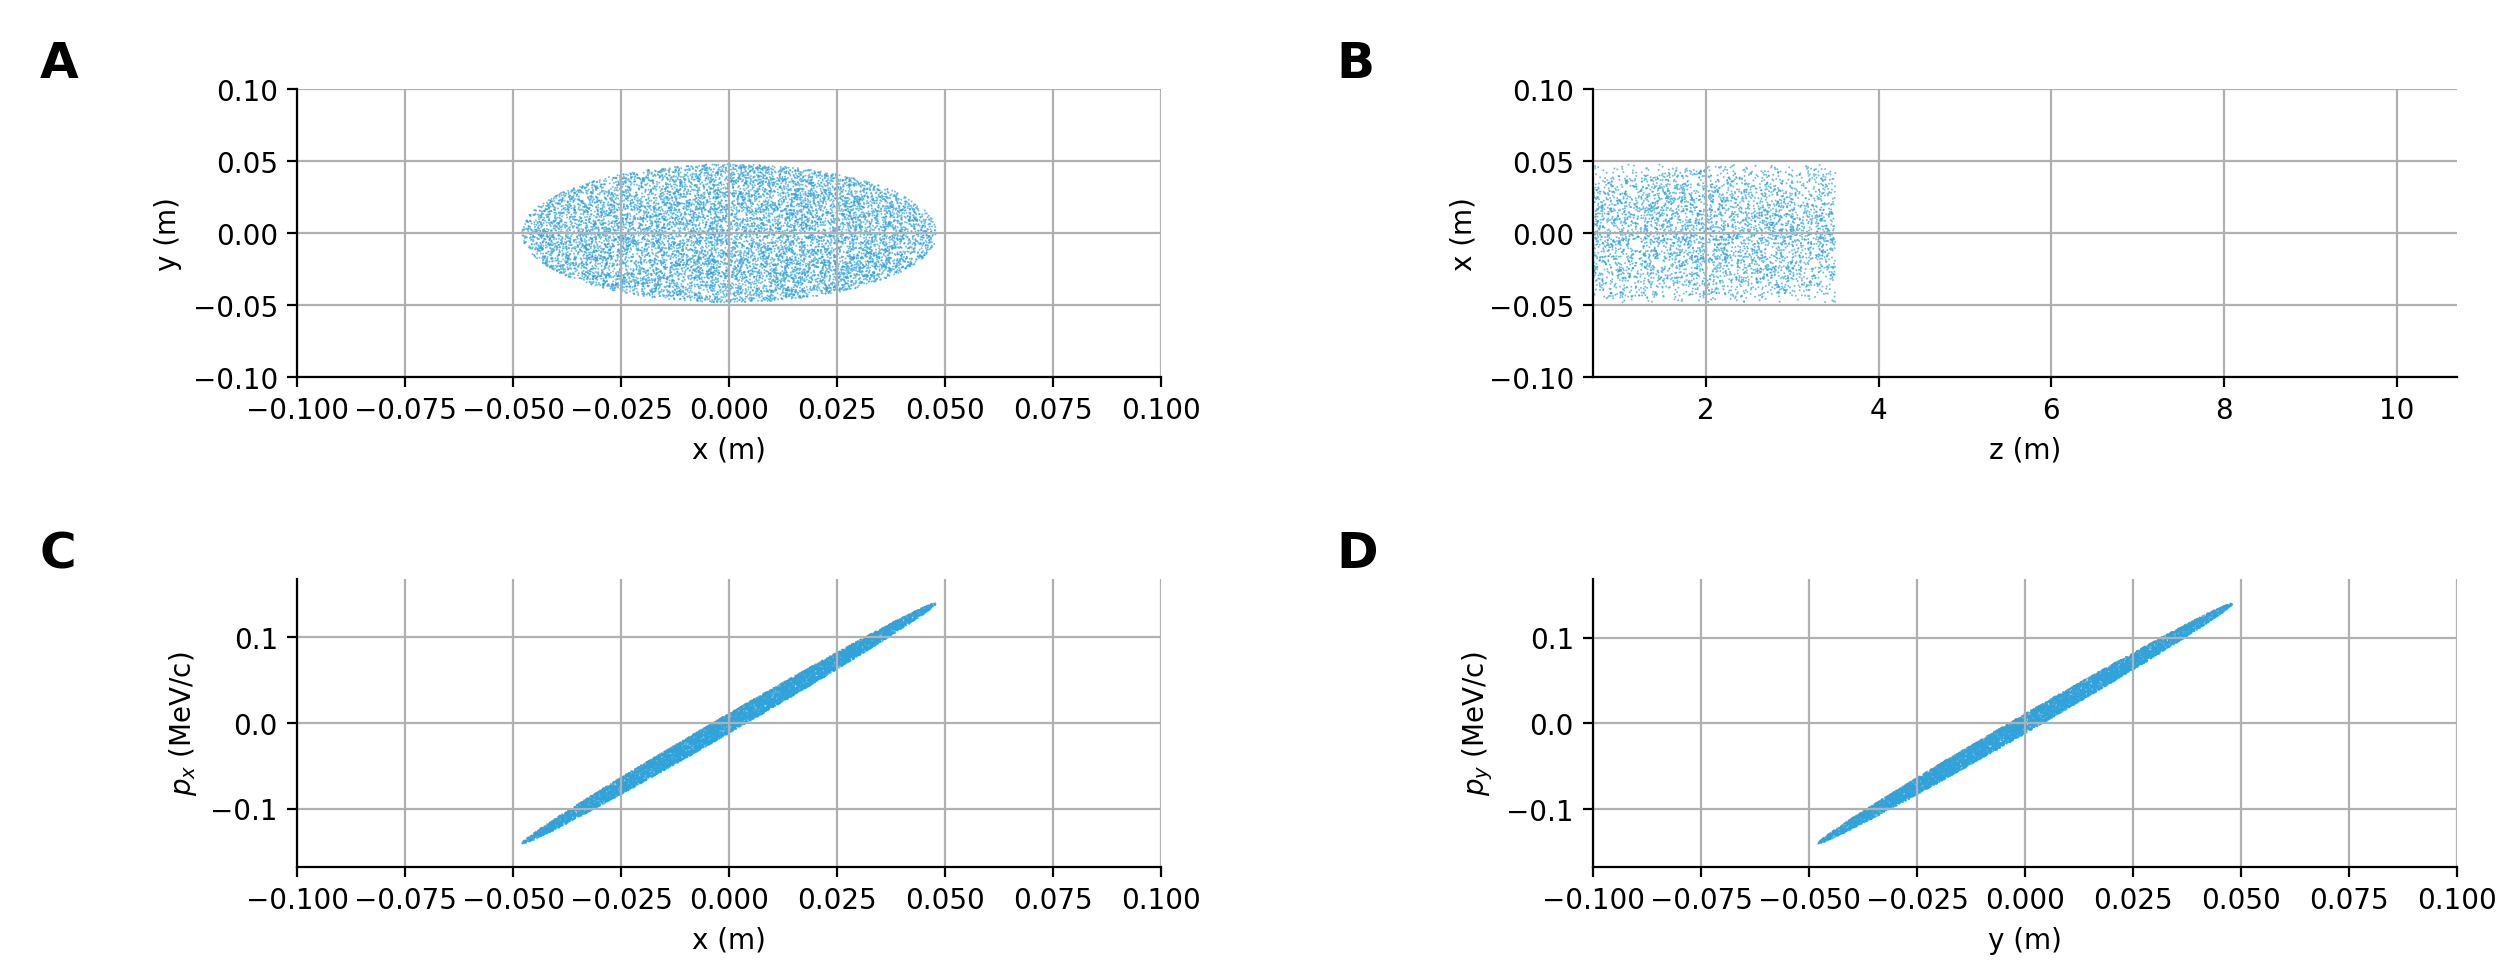

In [18]:
(beam_x_y + beam_z_x + beam_x_px + beam_y_py).cols(2)

In [19]:
print(beam)

Beam parameters:
	Type	electron
	Distribution	KV
	Particles	10000
	Current	500 A
	Energy	1.320 MeV
	Total momentum	1.758 MeV/c
	Rel. factor	3.583
	Radius x	48.0 mm
	Radius y	48.0 mm
	Radius z	3.5 m
	Radius x prime	70.0 mrad
	Radius y prime	70.0 mrad
	Horizontal centroid position	0.0 mm
	Vertical centroid position	0.0 mm
	Horizontal centroid angle	0.0 mrad
	Vertical centroid angle	0.0 mrad
	Normalized emittance x	2249.4 mm*mrad
	Normalized emittance y	2249.4 mm*mrad



## Run simulation!

In [20]:
kv_sim = kv.Simulation(beam, acc)
kv_sim.track()

In [21]:
rp_sim = rp.Simulation(beam, acc)
rp_sim.track()

z = 10.68 m (99.8 %) 

## Plot the simulation results:

In [22]:
def plot(i):
    df = rp_sim.result[i]
    kv_z_x = hv.Curve(((acc.z, kv_sim.envelope_x(acc.z))), kdims=[dim_z], vdims=[dim_x], label='kenv')*\
    hv.Curve(((acc.parameter,-kv_sim.envelope_x(acc.z))), kdims=[dim_z], vdims=[dim_x])
    rp_z_x = hv.Scatter(df, kdims=[dim_z, dim_x], label='redpic')
    return rp_z_x*kv_z_x

:HoloMap   [z]
   :Overlay
      .Scatter.Redpic :Scatter   [z,x]   (y,px,py,pz,Bx,By,Bz,Ex,Ey,Ez)
      .Curve.Kenv     :Curve   [z]   (x)
      .Curve.I        :Curve   [z]   (x)
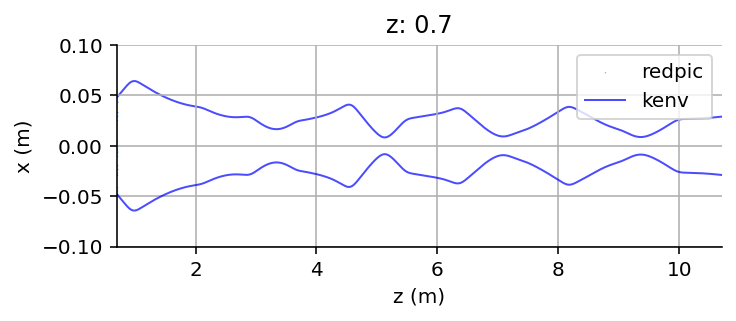
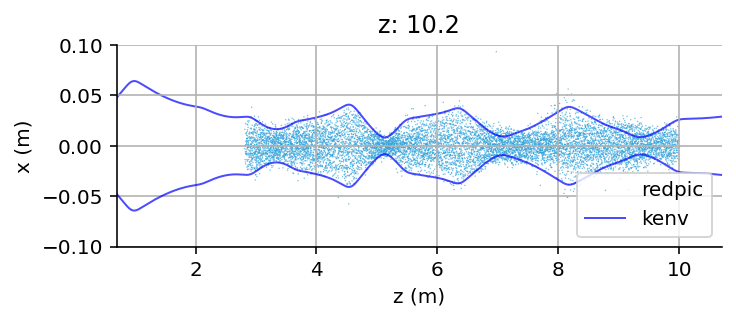
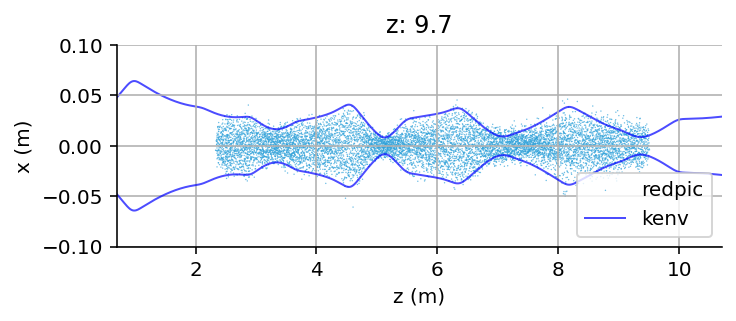
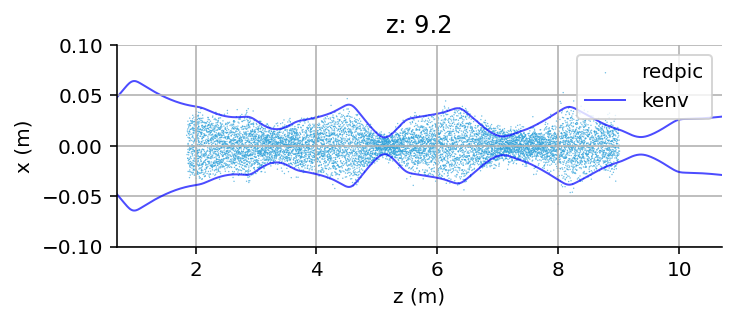
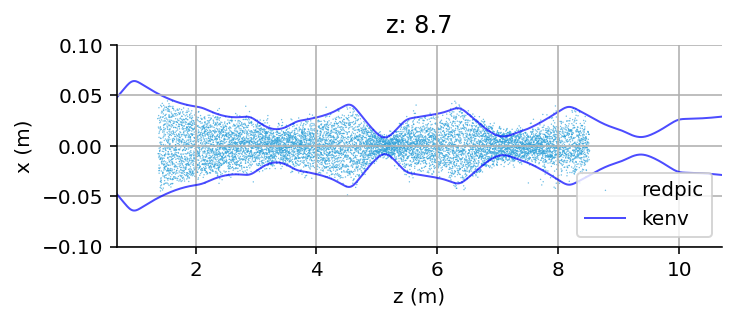
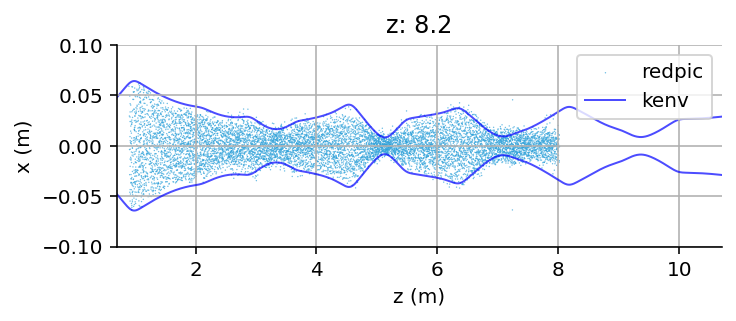
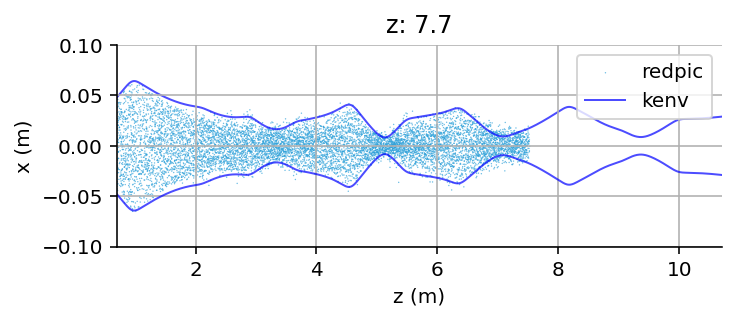
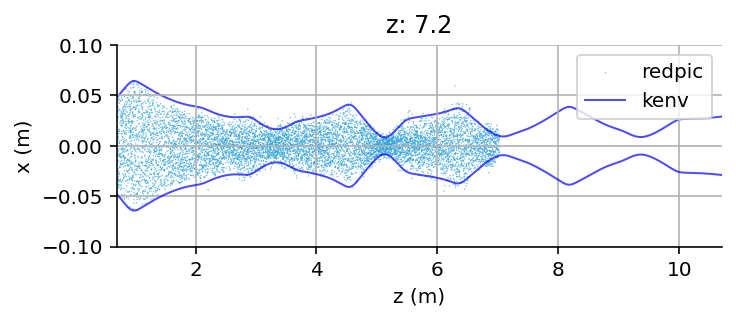
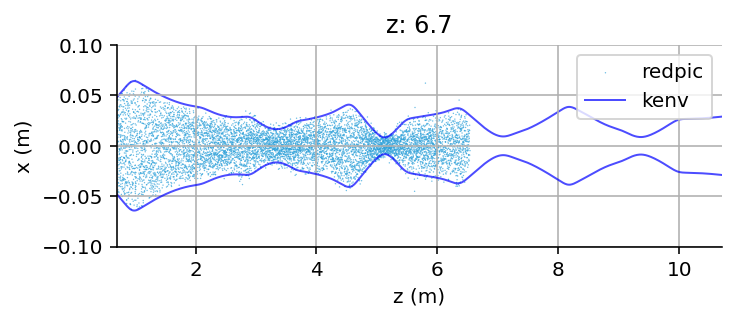
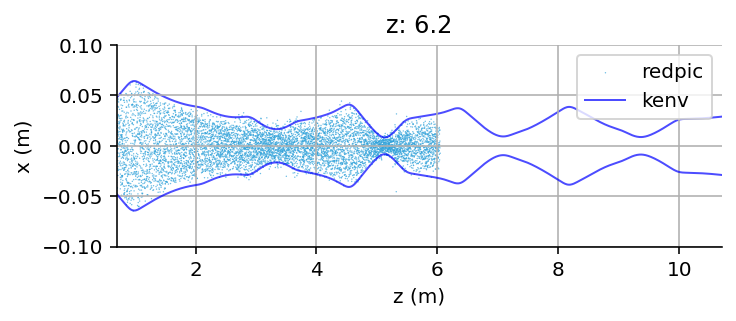
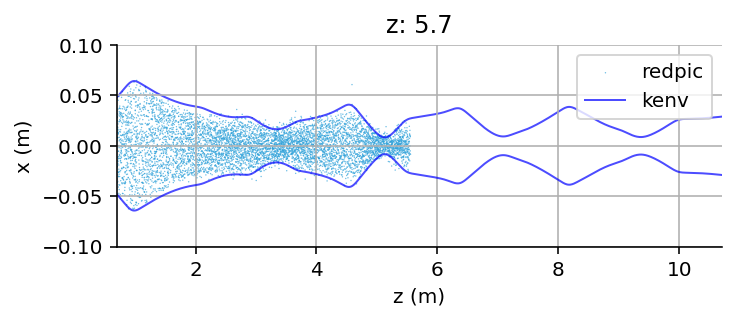
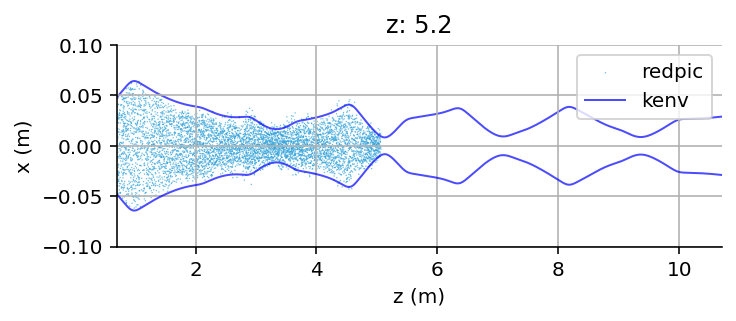
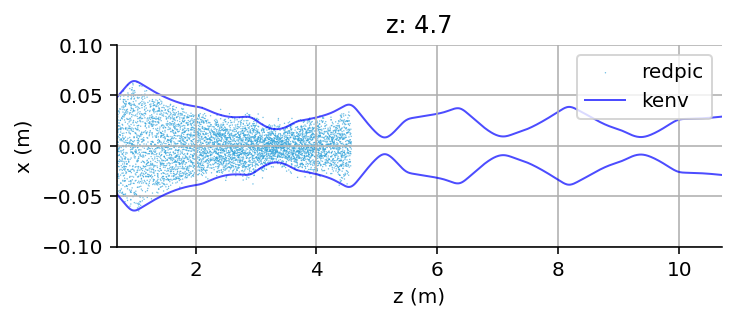
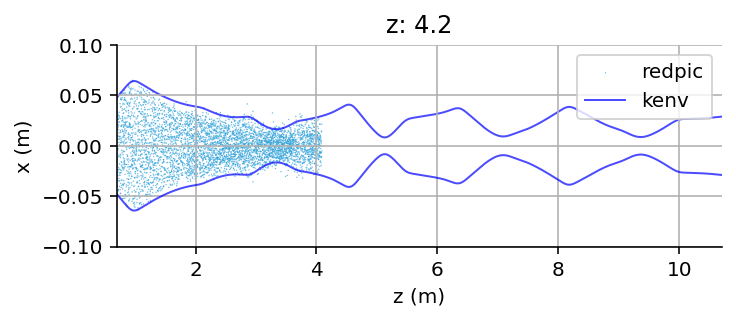
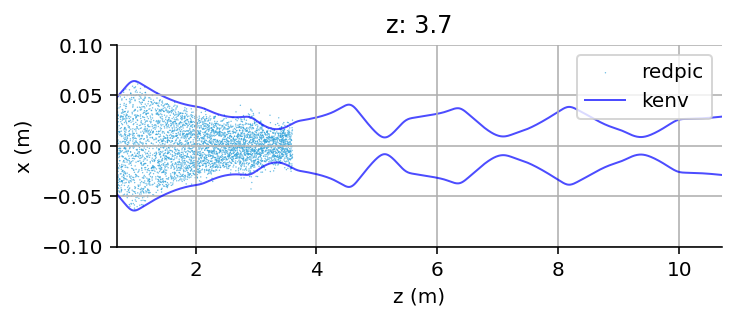
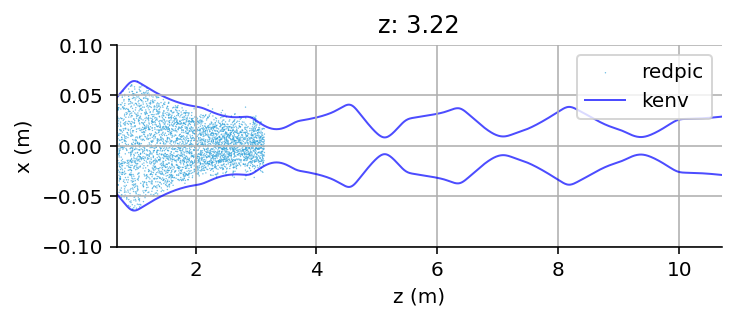
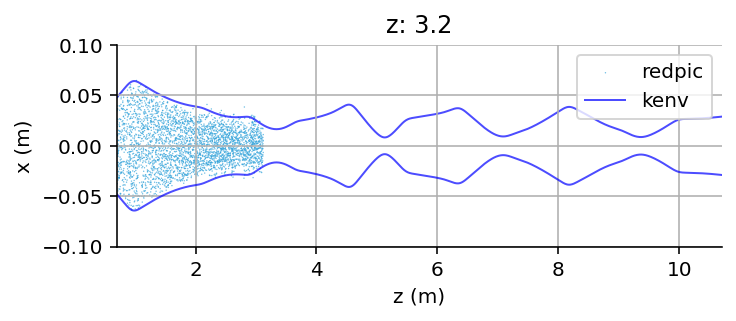
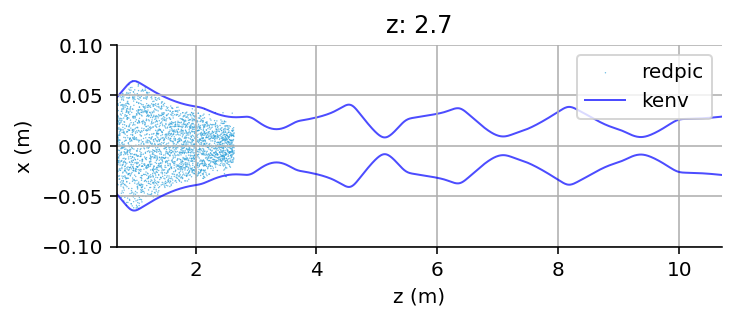
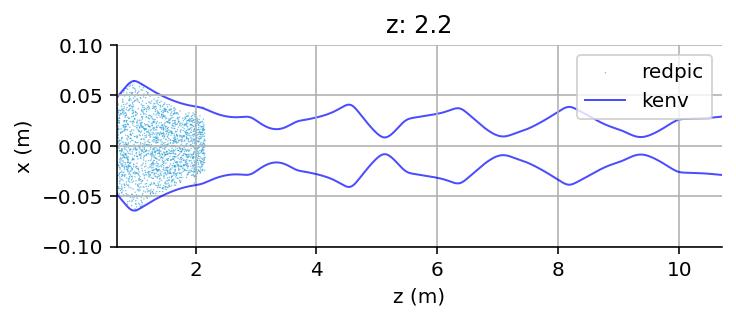
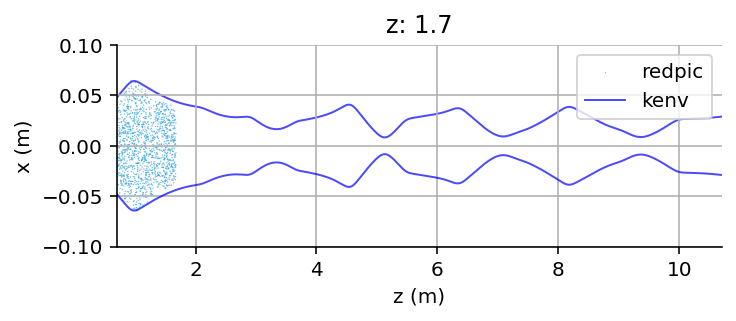
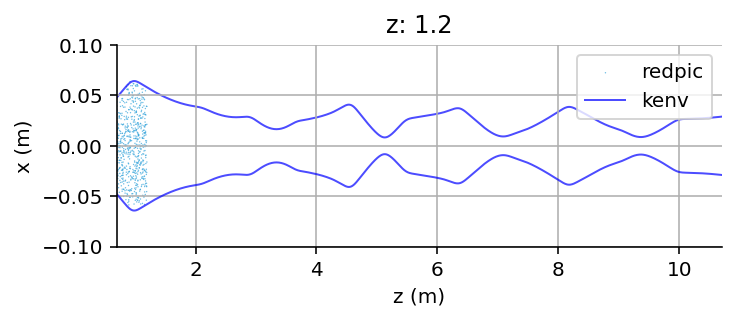
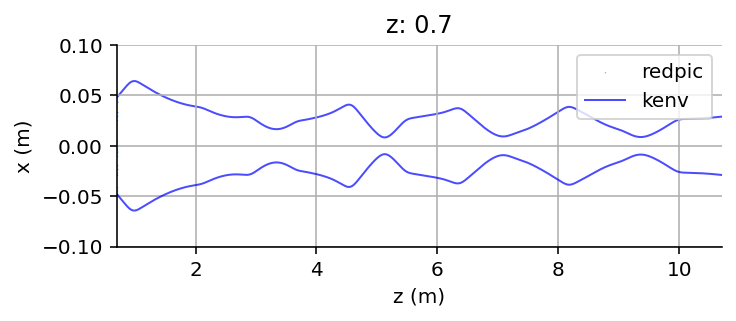

In [23]:
items = [(i, plot(i)) for i in list(rp_sim.result.keys())]

hv.HoloMap(items, kdims = ['z']).collate()